<a href="https://colab.research.google.com/github/OmegaJN/KNX/blob/master/Keras_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade keras


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


        <DATE>  <TIME>  <OPEN>  <HIGH>   <LOW>  <CLOSE1>   <VOL>  <CLOSE>
0     20100401       0  156010  160440  156010    160345  698912        1
1     20100402       0  160365  161275  159065    160420  358429        1
2     20100405       0  160495  162125  159475    161960  455304        1
3     20100406       0  161905  162495  160440    161635  709808       -1
4     20100407       0  161555  161800  157820    158100  798648       -1
...        ...     ...     ...     ...     ...       ...     ...      ...
3264  20230410       0   97640   98940   97500     98900  104117        1
3265  20230411       0   98970   99250   96630     96970  137115       -1
3266  20230412       0   96920   98060   96700     97970  104603        1
3267  20230413       0   97890   98460   97460     98220   94369        1
3268  20230414       0   98350   98910   97550     98770   93872        1

[3269 rows x 8 columns]
Epoch 1/500
33/33 [==============================] - 5s 10ms/step - loss: 0.0421
Epoch 

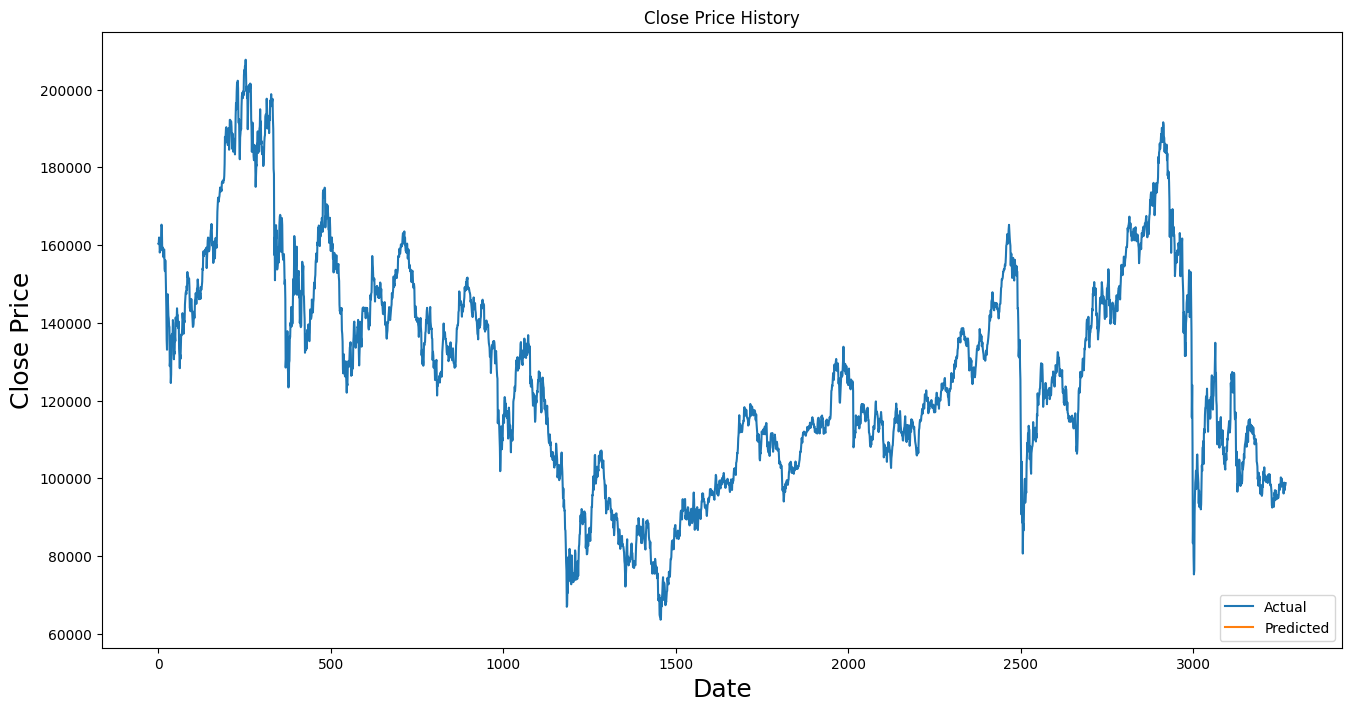

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv("data2.csv", sep=",")
print(df)
# Подготовка данных
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.iloc[:, 2:6])

window_size = 3
X = []
y = []

for i in range(window_size, len(scaled_data)):
    X.append(scaled_data[i-window_size:i, :])
    y.append(scaled_data[i, 3])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 4))

# Создание модели
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 4)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели
model.fit(X, y, epochs=500, batch_size=100)

# Прогнозирование
test_data = scaled_data[-window_size:, :]
test_data = np.array([test_data])
test_data = np.reshape(test_data, (test_data.shape[0], test_data.shape[1], 4))

predicted_close_scaled = model.predict(test_data)
combined_data = np.zeros((test_data.shape[0], 4))
combined_data[0, :3] = test_data[0, -1, :3]
combined_data[:, 3] = predicted_close_scaled.reshape(-1)
predicted_price = scaler.inverse_transform(combined_data)[:, 3]

# Вывод предполагаемой цены закрытия для следующего дня
print(f"Predicted Close Price for Next Day: {predicted_price[-1]}")

# Визуализация результатов
plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(df['<CLOSE1>'])
plt.plot(range(len(df) - 1, len(df)), predicted_price)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.legend(['Actual', 'Predicted'], loc='lower right')
plt.show()
